In [1]:
#import das bibliotecas
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ajuste da formatação do pandas
pd.options.display.float_format = '{0:.2f}'.format

## Carregamento e ajuste de bases

In [3]:
#carregar dados de orders
df_orders = pd.read_csv('orders.csv')
df_orders.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.70,0.00,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.70,0.00,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.50,0.00,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.90,0.00,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.90,0.00,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#seleção para remoção de outliers
df_orders = df_orders[(df_orders['order_amount'] >= 15) & (df_orders['order_amount'] <= 200)].copy()

In [5]:
#info
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333629 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           333629 non-null  int64  
 1   store_id                           333629 non-null  int64  
 2   channel_id                         333629 non-null  int64  
 3   payment_order_id                   333629 non-null  int64  
 4   delivery_order_id                  333629 non-null  int64  
 5   order_status                       333629 non-null  object 
 6   order_amount                       333629 non-null  float64
 7   order_delivery_fee                 333629 non-null  float64
 8   order_delivery_cost                327275 non-null  float64
 9   order_created_hour                 333629 non-null  int64  
 10  order_created_minute               333629 non-null  int64  
 11  order_created_day                  333629 no

In [6]:
#cast de order_moment_created para date
df_orders['order_moment_created'] = pd.to_datetime(df_orders['order_moment_created'])

c:\AppData\Local\Temp\ipykernel_2444\3443585112.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orders['order_moment_created'] = pd.to_datetime(df_orders['order_moment_created'])


In [7]:
#nova variável order_moment_created_month com o mês de data
df_orders['mes'] = df_orders['order_moment_created'].dt.month
df_orders['order_moment_created'].head()

0   2021-01-01 00:01:36
1   2021-01-01 00:04:26
2   2021-01-01 00:13:07
3   2021-01-01 00:19:15
4   2021-01-01 00:26:25
Name: order_moment_created, dtype: datetime64[ns]

## Correlações

In [8]:
#seleção das colunas com valores flutuantes
df_orders_corr = df_orders.select_dtypes(include=[np.float64])

In [9]:
#correlação pandas
corr = df_orders_corr.corr()

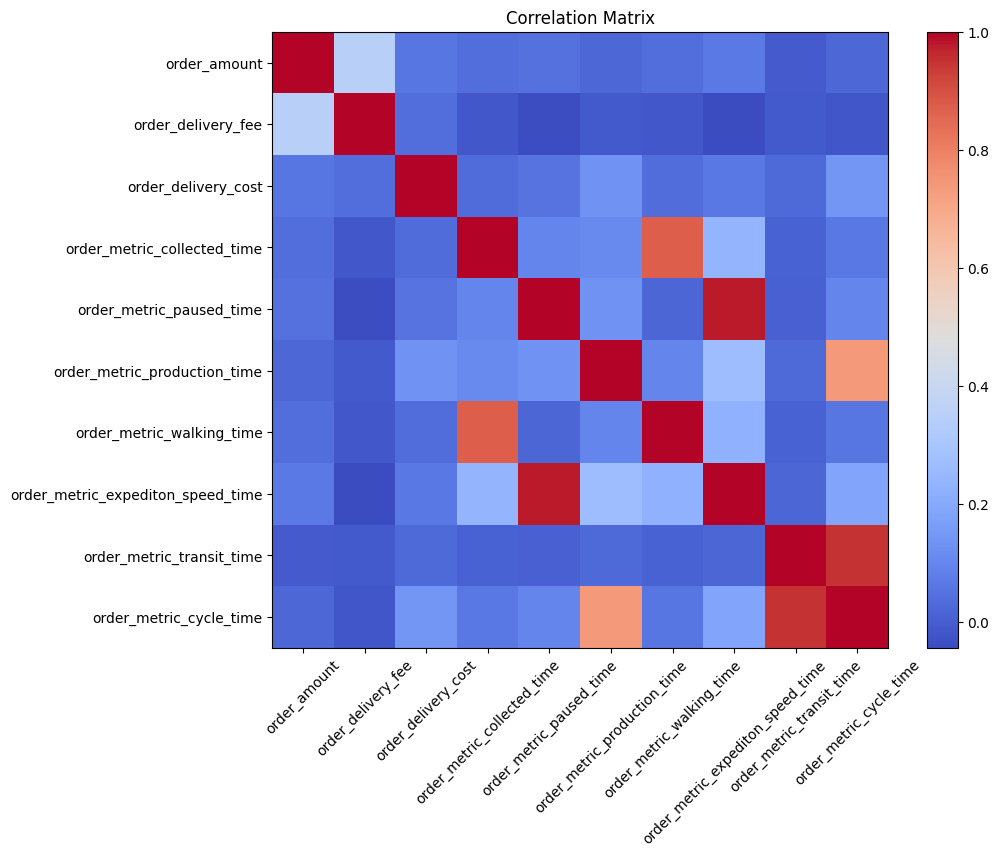

In [10]:
#heatmap com MALPLOTLIB

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.index)), corr.index)
plt.title('Correlation Matrix')
plt.show()

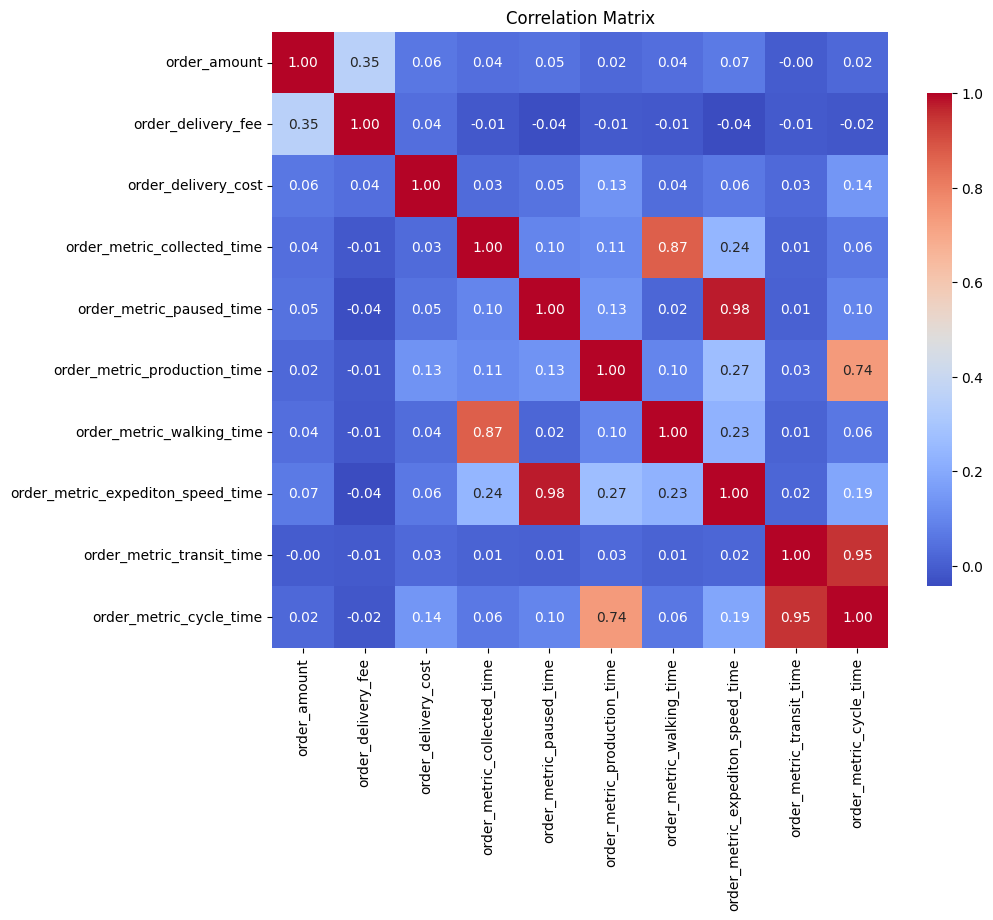

In [11]:
#heatmap com SEABORN
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

Escreva sua conclusão aqui

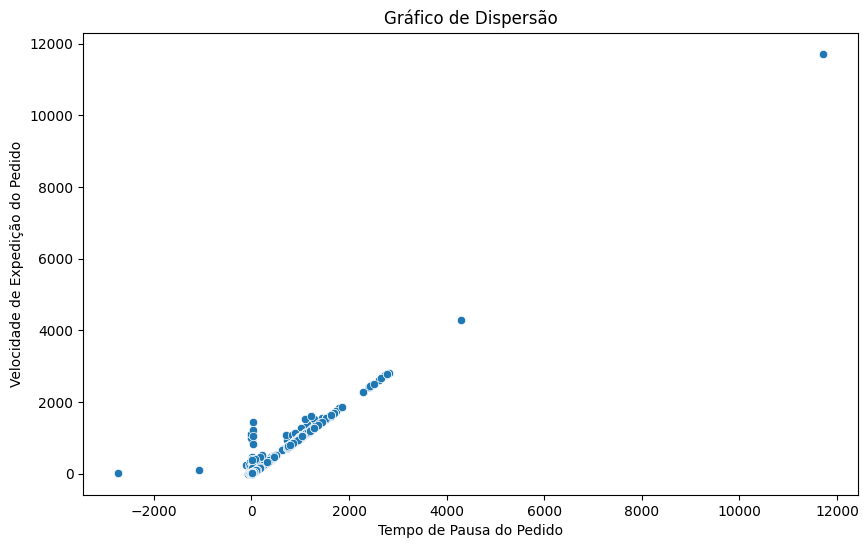

In [12]:
#configurações do scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_metric_paused_time', y='order_metric_expediton_speed_time', data=df_orders_corr)
#alterações do layout
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo de Pausa do Pedido')
plt.ylabel('Velocidade de Expedição do Pedido')
#apresentação do gráfico
plt.show()


## Realizado vs Meta - Linhas

In [13]:
#novo dataset com o total de vendas agrupado por mês
df_orders_realizado = df_orders.groupby(['mes']).agg({'order_amount':'sum'}).reset_index()
df_orders_realizado.head()

,mes,order_amount
0,1,5375860.04
1,2,5050208.34
2,3,7614463.74
3,4,7745563.77


In [14]:
#apresenta o nome das colunas do dataset de agregação
df_orders_realizado.columns

Index(['mes', 'order_amount'], dtype='object')

In [15]:
#altera o nome das colunas
df_orders_realizado.columns = ['mes', 'realizado']


In [16]:
#head do dataset após alteração do nome
df_orders_realizado.head()

,mes,realizado
0,1,5375860.04
1,2,5050208.34
2,3,7614463.74
3,4,7745563.77


In [17]:
#describe de orders
df_orders.describe()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,...,order_created_year,order_moment_created,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,mes
count,333629.00,333629.00,333629.00,333629.00,333629.00,333629.00,333629.00,327275.00,333629.00,333629.00,...,333629.00,333629,290223.00,272423.00,312151.00,269553.00,304793.00,312372.00,320707.00,333629.00
mean,82157643.37,1200.63,7.28,82157643.37,82157643.37,77.29,6.11,7.24,16.71,29.45,...,2021.00,2021-03-07 14:02:02.543240960,2.57,7.53,57.10,4.53,16.32,46.56,144.44,2.67
min,68405119.00,3.00,1.00,68405119.00,68405119.00,15.00,0.00,0.00,0.00,0.00,...,2021.00,2021-01-01 00:01:36,-1.47,-2728.35,0.00,-1.42,-0.82,-4.10,0.33,1.00
25%,76140660.00,409.00,5.00,76140660.00,76140660.00,39.30,0.00,5.16,15.00,15.00,...,2021.00,2021-02-06 23:53:15,0.77,1.13,9.22,2.10,4.40,11.72,32.40,2.00
50%,82974835.00,707.00,5.00,82974835.00,82974835.00,65.90,6.90,7.16,17.00,29.00,...,2021.00,2021-03-11 22:26:46,1.60,2.43,15.03,3.50,6.47,16.50,41.38,3.00
75%,87961771.00,1641.00,5.00,87961771.00,87961771.00,106.50,11.90,8.67,22.00,44.00,...,2021.00,2021-04-04 00:49:39,2.92,5.15,21.75,5.30,9.93,24.28,54.03,4.00
max,93139817.00,4679.00,49.00,93139817.00,93139817.00,200.00,575.60,156.00,23.00,59.00,...,2021.00,2021-04-30 23:59:48,2050.40,11712.28,85662.03,2735.52,11718.20,154261.10,154277.32,4.00
std,7080228.89,1165.88,7.10,7080228.89,7080228.89,45.36,5.32,3.96,6.17,17.22,...,0.00,NaN,11.37,55.21,760.47,14.36,75.19,771.50,1190.59,1.11


In [18]:
#leitura do nosso dataset de metas
df_orders_goal = pd.read_csv('orders_goal.csv', sep=';')
df_orders_goal.head()

,mês,meta
0,1,4000000
1,2,3000000
2,3,12000000
3,4,15000000


In [19]:
#avaliação das colunas do dataset de metas
df_orders_goal.columns

Index(['mês', 'meta'], dtype='object')

In [20]:
#altera o nome das colunas do dataset de metas
df_orders_goal.columns = ['mes', 'meta']

In [21]:
#novo dataset com o merge do realizado e meta
df_orders_meta_realizado = df_orders_realizado.merge(df_orders_goal, on=['mes'], how='left')
df_orders_meta_realizado.head()

,mes,realizado,meta
0,1,5375860.04,4000000
1,2,5050208.34,3000000
2,3,7614463.74,12000000
3,4,7745563.77,15000000


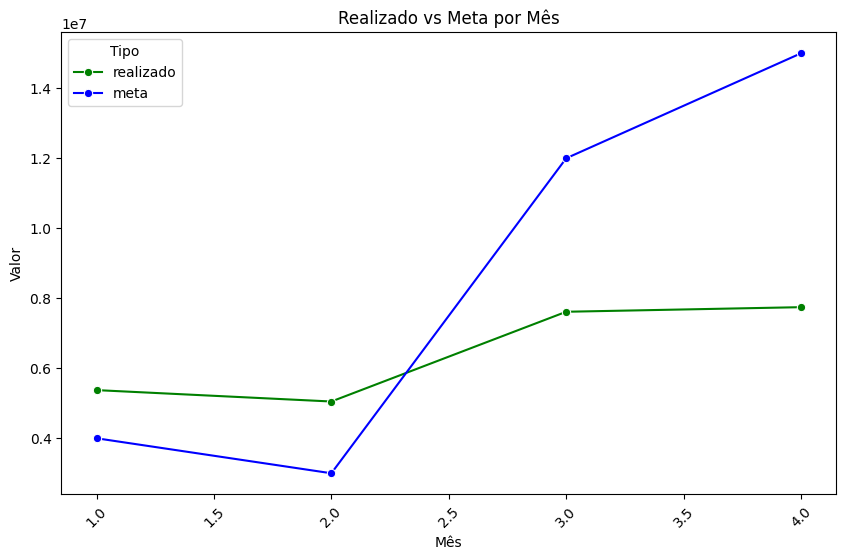

In [22]:
# Transformar os dados para formato "long"
df_long = df_orders_meta_realizado.melt(id_vars='mes', value_vars=['realizado', 'meta'], 
                                         var_name='Tipo', value_name='Valor')

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='mes', y='Valor', hue='Tipo', marker='o',
             palette={'realizado': 'green', 'meta': 'blue'})

# Adicionar título e rótulos
plt.title('Realizado vs Meta por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.legend(title='Tipo')
plt.show()

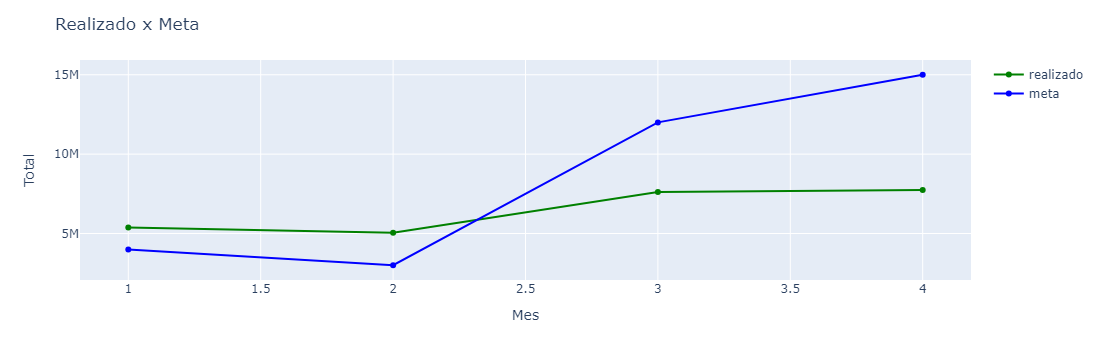

In [34]:
fig = px.line(df_orders_meta_realizado, x='mes', y=['realizado', 'meta'], markers=True, color_discrete_map={'realizado':'green', 'meta':'blue'})

fig.update_layout(title='Realizado x Meta', xaxis_title='Mes', yaxis_title="Total", legend_title='')

fig.show()

#### A conclusão é que o plotly não funciona no meu jupyter notebook (Agora foi)

## Finalizados vs Cancelados - Pizza

In [24]:
#configurações do gráfico de pizza

#apresentação do gráfico


Escreva sua conclusão aqui

## Finalizados vs Cancelados - Linhas

In [25]:
#nova coluna order_moment_created_day somente com a data do order_moment_created


In [26]:
#novo dataset agrupado por dia e status com a agregação de count do order_id e soma do order_amount


In [27]:
#head do novo dataset


In [28]:
#inicio do fig com as configurações de linha

#alterações do layout

#apresentação do gráfico


Escreva sua conclusão aqui

## Maiores lojas por pedido - Barras

In [29]:
#novo dataset com as lojas

In [30]:
#novo dataset com o merge de pedidos e lojas


In [31]:
#novo dataset com o total de vendas por loja


In [32]:
#top 10 lojas em total de venda


In [33]:
#inicio do fig com as configurações de linha


#alterações do layout


#apresentação do gráfico



Escreva sua conclusão aqui